## _Computer Vision_
### Lab 2, _Histogram and Filtering_.
#### >> Topics  :
* ##### Geometric Transformations.
* ##### Histogram and Equalization.
* ##### Image Filters.

##### >> Note  :
> ##### to close image windows smoothly please **press any key** on your keyboard, **don't close** it directly by clicking on 'X' to avoid kernel interruption.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Section 0, _Helper Functions_:
> ##### This cell contains some helper function such as error_handler, please run it without any modification.

In [2]:
# please don't modify this code.
def show_text_window(titles):
    black = np.zeros((len(titles) * 150, 300))
    for idx, t in enumerate(titles):
        place = idx + 1
        cv.putText(black, t, (10, place * 100), cv.FONT_HERSHEY_SIMPLEX, 1, (200, 0, 200), 1, 2)
    cv.imshow("Values", black)


def get_updated_value(key, value, **kwargs):
    if key == ord('+'):
        return value, 0
    elif key == ord('-'):
        return -value, 0
    elif key == ord('*'):
        return 0, kwargs.get('value2', value)
    elif key == ord('/'):
        return 0, -kwargs.get('value2', value)

    else:
        raise Exception('Terminated by User!')


def error_handler(func):
    def wrapper(*args, **kwargs):
        try:
            func(*args, **kwargs)
        except Exception as ex:
            cv.destroyAllWindows()
            print(f'Error: {ex}')

    return wrapper

### Section 1, _Geometric Transformation_:
> ##### In this section we will discover `Affine` and `Perspective` transformations which are often applied to images in image processing and computer vision to correct distortion, align images, and prepare them for further analysis.

#### 1.1 Affine Transformation
* ##### Affine transformations combine translation, rotation, scaling, and shearing.
* ##### Transformation matrix contains 6 variables which control the affine process.
* ##### Lines are still be lines and parallel are still be parallel.
* ##### [Click to check the documentation](https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html)


In [3]:
@error_handler
def apply_affine_transform(path):
    img = cv.imread(path)
    rows, cols, depth = img.shape
    # select 3 points from original image, and map them to new positions in new image.
    p1, p2, p3 = [0, 0], [170, 0], [0, 100]
    new_p1, new_p2, new_p3 = [200, 0], [300, 50], [150, 50]

    pts1 = np.array([p1, p2, p3]).astype(np.float32)
    pts2 = np.array([new_p1, new_p2, new_p3]).astype(np.float32)

    # calculate transformation matrix depending on mapping that we have done.
    M = cv.getAffineTransform(pts1, pts2)

    # apply transformation on image and get result image.
    dst = cv.warpAffine(img, M, (cols, rows))

    cv.imshow('img', img)
    cv.waitKey(0)

    cv.polylines(img, [pts1.astype(np.int32)], True, (0, 255, 0), 6)
    cv.imshow('img', img)
    cv.waitKey(0)

    cv.polylines(img, [pts2.astype(np.int32)], True, (0, 0, 255), 6)
    cv.imshow('img', img)
    cv.waitKey(0)

    cv.polylines(dst, [pts2.astype(np.int32)], True, (0, 0, 255), 6)
    cv.imshow('dst', dst)
    cv.waitKey(0)
    cv.destroyAllWindows()

path = '../Images/stray.png'
apply_affine_transform(path)

#### 1.2 Perspective Transformation
* ##### It's used to correct for more complex distortions that arise when capturing 3D scenes in 2D images
* ##### Transformation matrix contains 8 variables which control the perspective process.
* ##### Lines are not necessary to remain lines and parallel are not necessary remain parallel.
* ##### [Click to check the documentation](https://theailearner.com/2020/11/06/perspective-transformation/)

In [5]:
@error_handler
def test_perspective(path):
    img = cv.imread(path)
    rows, cols, depth = img.shape
    cv.imshow('img', img)
    g, h = 0, 0

    while True:
        # transformation matrix.
        M = np.array([[1, 0, 0],
                      [0, 1, 0],
                      [g, h, 1]]).astype(np.float32)
        # apply perspective
        dst = cv.warpPerspective(img, M, (cols, rows))

        cv.imshow('dst', dst)
        show_text_window([f'g: {g:.4f}', f'h: {h:.4f}'])

        # get input and update g, h.
        k = cv.waitKey(0)
        uv1, uv2 = get_updated_value(k, 0.0001)
        g += uv1
        h += uv2

path = '../Images/numbers table.png'
test_perspective(path)

Error: Terminated by User!


In [6]:
@error_handler
def apply_perspective_transform(path):
    img = cv.imread(path)
    cv.imshow('img', img)
    cv.waitKey(0)

    rows, cols, depth = img.shape
    # select 4 points on original image and their new positions in result image.
    p1, p2, p3, p4 = [130, 165], [645, 143], [85, 645], [700, 625]
    new_p1, new_p2, new_p3, new_p4 = [0, 0], [
        cols-1, 0], [0, rows-1], [cols-1, rows-1]

    pts1 = np.array([p1, p2, p3, p4]).astype(np.float32)
    pts2 = np.array([new_p1, new_p2, new_p3, new_p4]).astype(np.float32)

    # calculate transformation matrix and apply perspective transformation.
    M = cv.getPerspectiveTransform(pts1, pts2)
    dst = cv.warpPerspective(img, M, (cols, rows))

    for p in pts1:
        cv.circle(img, p.astype(np.int32), 5, (0,  0, 255), -1)
        cv.imshow('img', img)
        cv.waitKey(0)

    cv.imshow('dst', dst)
    cv.waitKey(0)
    cv.destroyAllWindows()

path = '../Images/sudoku.jpg'
apply_perspective_transform(path)

### Section 2, _Histogram and Equalization_:
> ##### In this section we will discover `Histogram` and `Histogram Equalization` which are are especially valuable for tasks that involve adjusting brightness, contrast, and segmentation in images to improve their quality and make them suitable for further analysis or display.

#### 2.1 Histogram
* ##### It shows the distribution of pixel intensity values in an image.
* ##### It provides valuable information about the image's brightness and contrast.
* ##### [Click to check the documentation](https://docs.opencv.org/3.4/d8/dbc/tutorial_histogram_calculation.html)

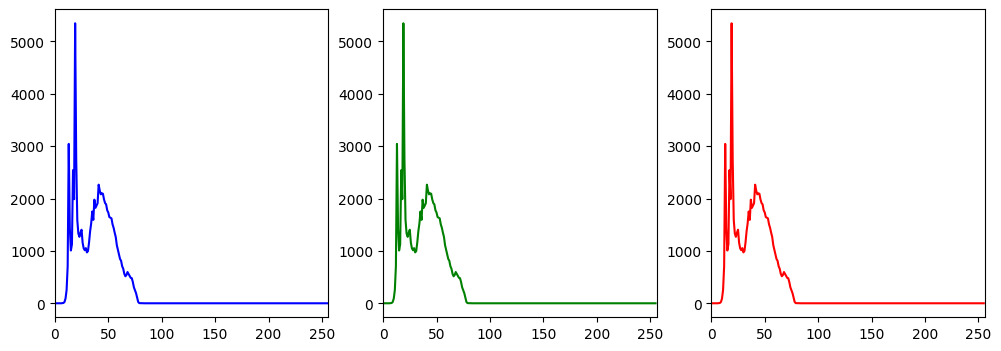

In [9]:
@error_handler
def calc_show_hist(img: cv.Mat, title="Image"):
    color = ('b', 'g', 'r')
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    # plot histogram for all three channels.
    for i, col in enumerate(color):
        hist = cv.calcHist([img], [i], None, [256], [0, 256])
        plt.sca(axs[i])
        plt.plot(hist, color=col)
        plt.xlim([0, 256])
    plt.show()

    cv.imshow(title, cv.cvtColor(img, cv.COLOR_BGR2RGB))
    cv.waitKey(0)

# Run
img = cv.imread("../Images/beans.png")
calc_show_hist(img)
cv.destroyAllWindows()

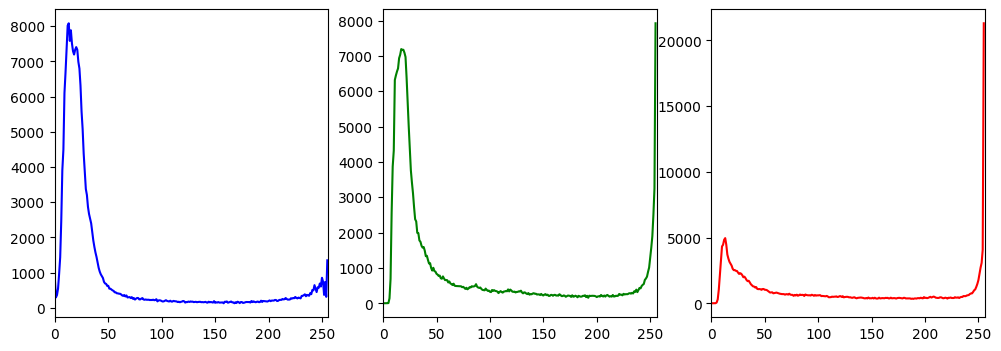

In [6]:
img = cv.imread("../Images/bird.png")
calc_show_hist(img)
cv.destroyAllWindows()

#### 2.2 Histogram Equalization
* ##### It is a technique used to enhance the contrast of an image
* ##### It redistributes the pixel intensities to have a more uniform distribution, resulting in improved image quality.
* ##### [Click to check the documentation](https://docs.opencv.org/3.4/d4/d1b/tutorial_histogram_equalization.html)

In [10]:
def equalize_hist(img: cv.Mat):
    print('Histogram before equalization.')
    calc_show_hist(img)

    # histogram equalization
    equalized_img = cv.merge([cv.equalizeHist(c) for c in cv.split(img)])

    print('Histogram after equalization.')
    calc_show_hist(equalized_img, 'Equalized Image')

    cv.destroyAllWindows()

Histogram before equalization.


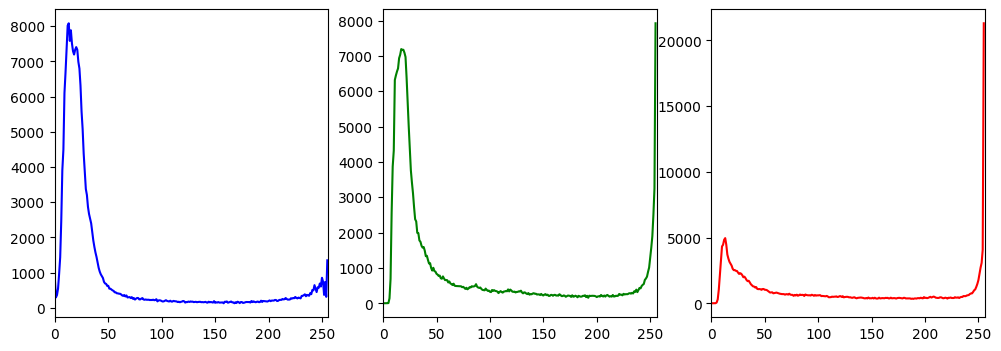

Histogram after equalization.


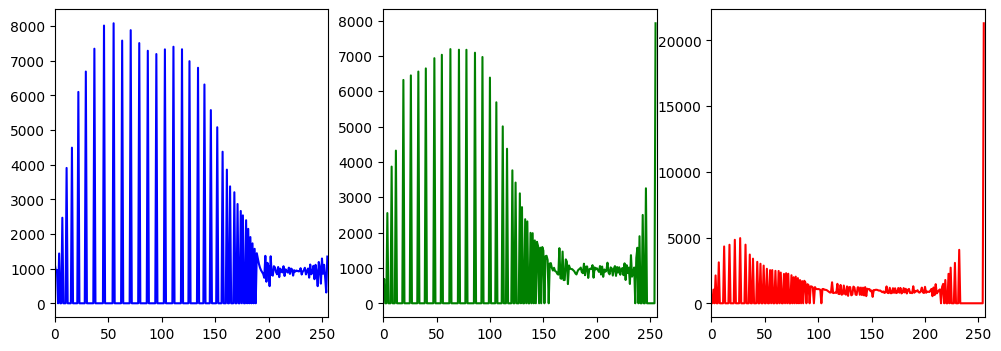

In [11]:
img = cv.imread("../Images/bird.png")
equalize_hist(img)

### Section 3, _Image Filters_:
> ##### In this section we will discover `Average`, `Gaussian` and `Median` which are used to enhance, smooth, or reduce noise in digital images.
> ##### [Click to check the documentation](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html).

 #### 3.0 Prepare Functions

In [15]:
def avg_blur(img: cv.Mat, size: int):
    return cv.blur(img, (size, size))


def gaussian_blur(img: cv.Mat, size: int):
    return cv.GaussianBlur(img, (size, size), sigmaX=0)


def median_blur(img: cv.Mat, size: int):
    return cv.medianBlur(img, size)

In [19]:
@error_handler
def show_filtering_result(img: cv.Mat, filter_func):
    n = 1
    while True:
        show_text_window([f'Kernel Size: {n, n}'])

        blur_img = filter_func(img, n)
        cv.imshow('blurred image', blur_img)

        k = cv.waitKey(0)
        uv, _ = get_updated_value(k, 2)

        n += uv

 #### 3.1 Average filter
* ##### It replaces each pixel's value with the average of the pixel values within a specified neighborhood or kernel.
* ##### It is useful for smoothing and reducing noise in images.
* ##### it may also blur edges and fine details.


In [20]:
img = cv.imread('../Images/home.jpg')
show_filtering_result(img, avg_blur)

Error: Terminated by User!


 #### 3.2 Gaussian filter
* ##### It's a linear filter that replaces each pixel's value with a weighted average of pixel values within a Gaussian-shaped kernel.
* ##### It provides smoothing while preserving edges better than the Average filter
* ##### It is often used for image blurring, noise reduction, and image pyramid generation.

In [21]:
img = cv.imread('../Images/home.jpg')
show_filtering_result(img, gaussian_blur)

Error: Terminated by User!


 #### 3.3 Median filter
* ##### The Median filter is a nonlinear filter that replaces the pixel value with the median value of the pixel values in a kernel.
* ##### It is effective at reducing certain types of noise (salt-and-pepper noise) while preserving edge information.
* ##### It is less likely to blur edges compared to linear filters.

In [22]:
img = cv.imread('../Images/home.jpg')
show_filtering_result(img, median_blur)

Error: Terminated by User!


### The End.